In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Final_Yangon/final_yangon.csv')

In [3]:
df.head()

,Type,Bed Room,Bath Room,Floor,city,Area_ft_square,price_million
0,Apartment,2.0,1.0,3.0,Okkalappa South,972.0,299.0
1,House,4.0,4.0,2.5,Dagon Myothit (North),1200.0,1170.0
2,House,5.0,7.0,3.0,Dagon Myothit (North),1320.0,980.0
3,House,5.0,3.0,2.0,Mayangone,4225.0,3800.0
4,House,3.0,3.0,2.5,Yankin,2400.0,3500.0


In [4]:
df.isnull().sum()

Type              0
Bed Room          0
Bath Room         0
Floor             0
city              0
Area_ft_square    0
price_million     0
dtype: int64

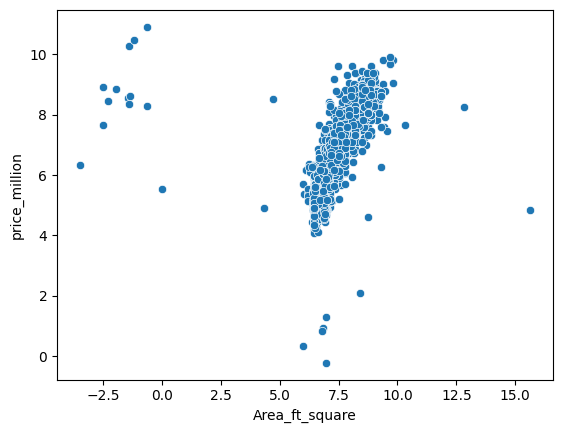

In [5]:
sns.scatterplot(x= np.log(df['Area_ft_square']) , y = np.log(df['price_million']))
plt.show()

<Axes: >

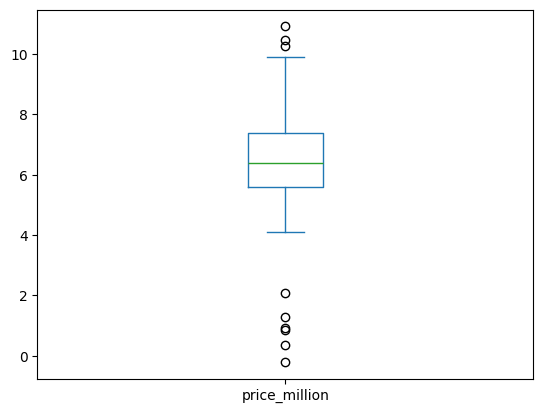

In [6]:
np.log(df['price_million']).plot(kind = 'box')

<Axes: ylabel='Density'>

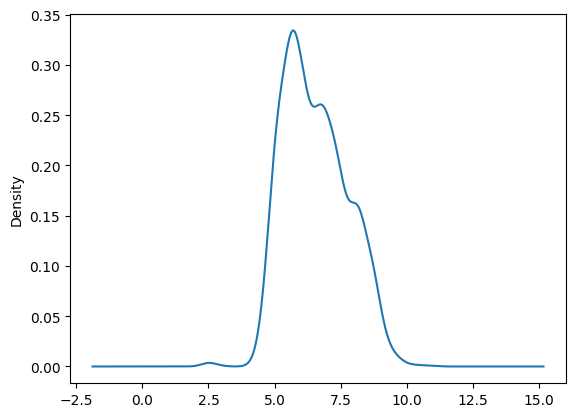

In [7]:
np.log(df['price_million']+10).plot(kind = 'kde')

<Axes: >

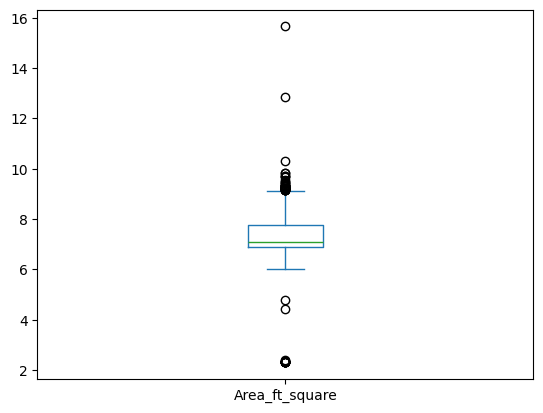

In [8]:
np.log(df['Area_ft_square']+10).plot(kind = 'box')

In [9]:
df['price_million_by_1'] = 1/df['price_million']

<Axes: ylabel='Density'>

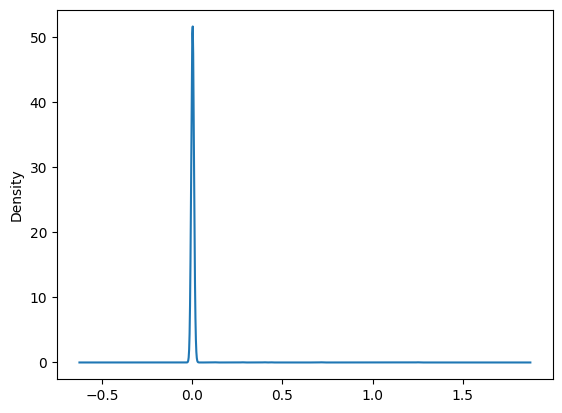

In [10]:
df['price_million_by_1'].plot(kind = 'kde')

In [11]:
price_million = df['price_million'].copy()

In [12]:
price_million = pd.DataFrame(price_million)

<Axes: >

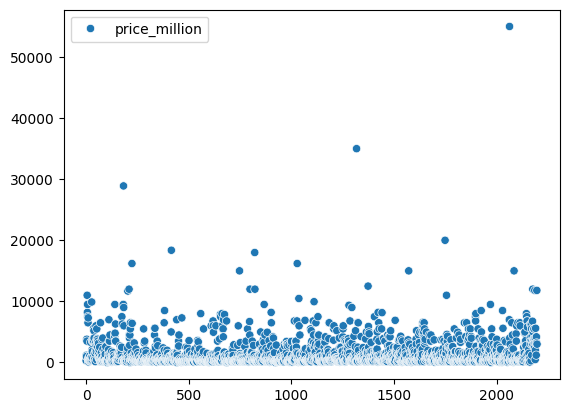

In [13]:
sns.scatterplot(price_million)

In [14]:
q1 = price_million['price_million'].quantile(0.25)
q3  = price_million['price_million'].quantile(0.75)
iqr = q3 - q1

upper_limit = q3+(1.5*iqr)
lower_limit = q1 - (1.5*iqr)

print(iqr)

1335.0


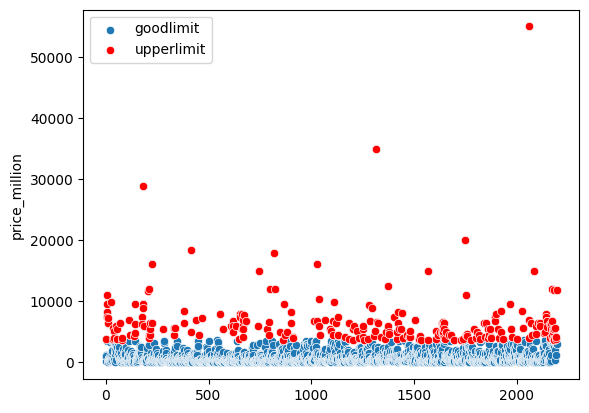

Upper Limit shape(243, 1)
Lower Limit shape(0, 1)
Total Data Shape(2197, 1)


In [15]:
sns.scatterplot(price_million['price_million'] , label = 'goodlimit')
sns.scatterplot(price_million[(price_million['price_million']>upper_limit)]['price_million'],color = 'red' , label = 'upperlimit')
sns.scatterplot(price_million[(price_million['price_million']<lower_limit)]['price_million'],color = 'green' , label = 'lowerlimit')
plt.legend()
plt.show()

print(f"Upper Limit shape{price_million[(price_million['price_million']>upper_limit)].shape}")
print(f"Lower Limit shape{price_million[(price_million['price_million']<lower_limit)].shape}")
print(f"Total Data Shape{price_million.shape}")

In [16]:
outliers = price_million[(price_million['price_million']>upper_limit)]

<Axes: ylabel='Density'>

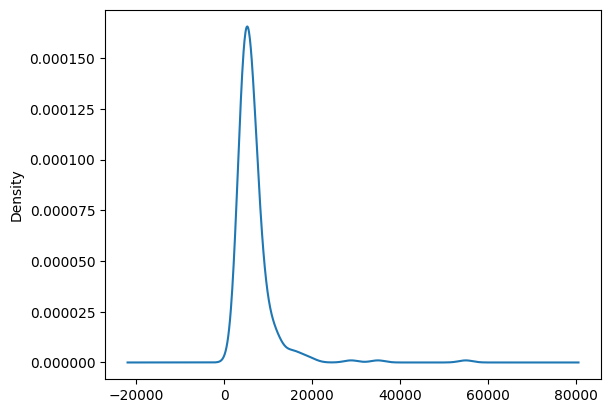

In [17]:
outliers['price_million'].plot(kind = 'kde')

In [18]:
outlier_index = price_million[(price_million['price_million']>upper_limit)].index
price_million[(price_million['price_million']>=upper_limit)] = upper_limit

<Axes: ylabel='price_million'>

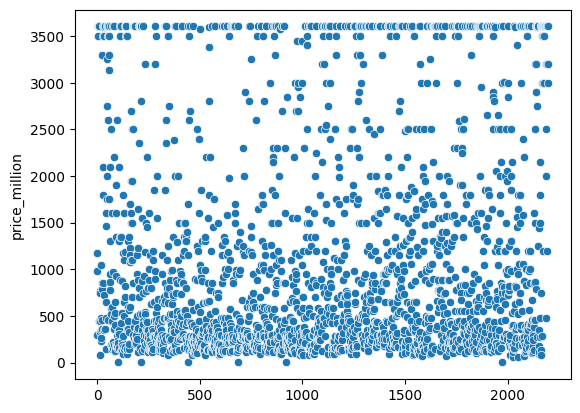

In [19]:
sns.scatterplot(price_million['price_million'])

<Axes: xlabel='price_million', ylabel='Density'>

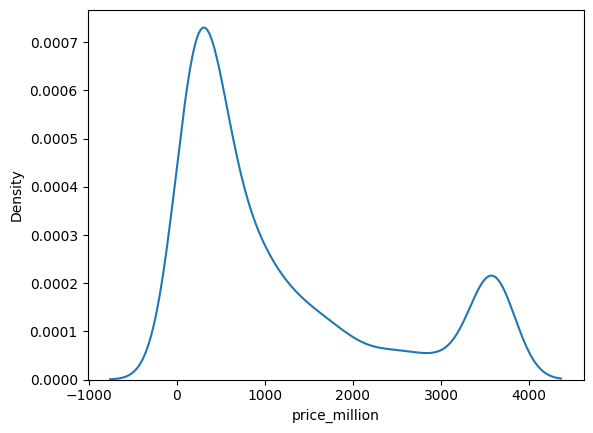

In [20]:
sns.kdeplot((price_million['price_million']))

<Axes: ylabel='price_million'>

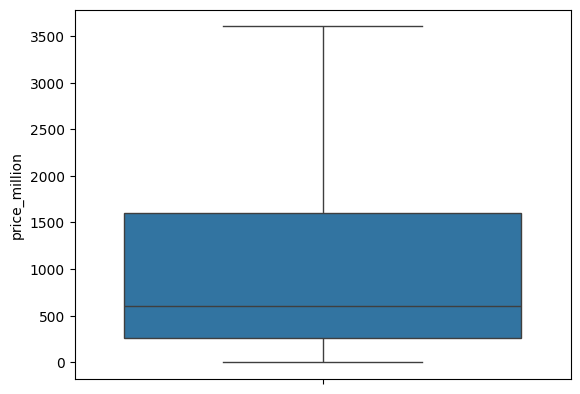

In [21]:
sns.boxplot(price_million['price_million'])

In [22]:
new_df = df.copy()

In [23]:
new_df.drop(columns = 'price_million_by_1' , inplace =True)

In [24]:
new_df['price_million'] = price_million['price_million'].copy()

In [25]:
new_df['price_million']

0        299.0
1       1170.0
2        980.0
3       3602.5
4       3500.0
         ...  
2192    1200.0
2193    3602.5
2194    3200.0
2195    3602.5
2196    3000.0
Name: price_million, Length: 2197, dtype: float64

In [26]:
new_df

,Type,Bed Room,Bath Room,Floor,city,Area_ft_square,price_million
0,Apartment,2.0,1.0,3.0,Okkalappa South,972.0,299.0
1,House,4.0,4.0,2.5,Dagon Myothit (North),1200.0,1170.0
2,House,5.0,7.0,3.0,Dagon Myothit (North),1320.0,980.0
3,House,5.0,3.0,2.0,Mayangone,4225.0,3602.5
4,House,3.0,3.0,2.5,Yankin,2400.0,3500.0
...,...,...,...,...,...,...,...
2192,House,5.0,3.0,3.0,Hlaing,1495.0,1200.0
2193,House,7.0,7.0,3.0,Thingangkuun,6400.0,3602.5
2194,House,7.0,4.0,2.0,Thingangkuun,6300.0,3200.0
2195,House,7.0,7.0,3.5,Bahan,7925.0,3602.5


<Axes: xlabel='Bed Room', ylabel='price_million'>

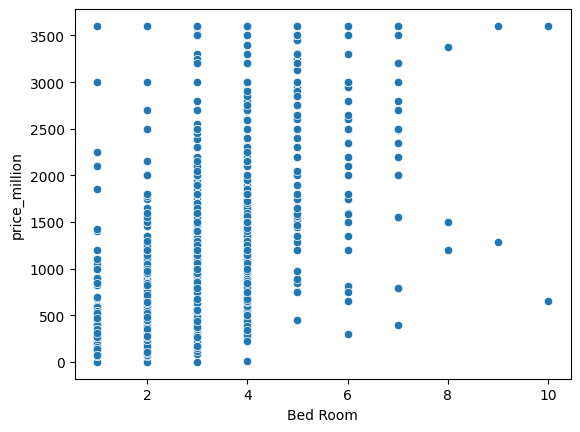

In [27]:
sns.scatterplot(x = new_df['Bed Room'] , y = new_df['price_million'])

<Axes: xlabel='Bed Room'>

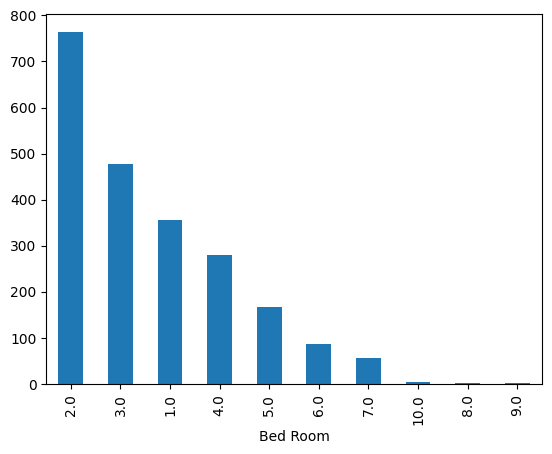

In [28]:
new_df['Bed Room'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Bath Room'>

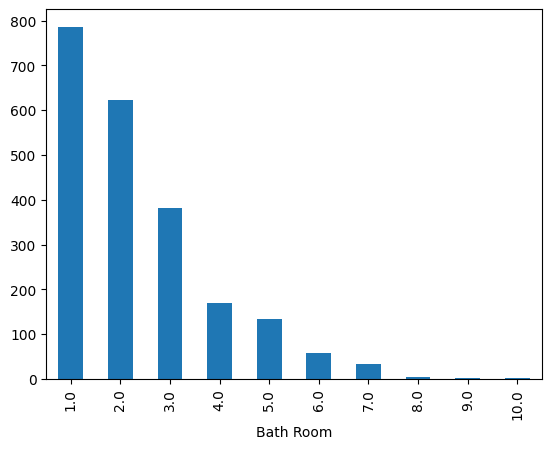

In [29]:
new_df['Bath Room'].value_counts().plot(kind = 'bar')

In [30]:
new_df.head()

,Type,Bed Room,Bath Room,Floor,city,Area_ft_square,price_million
0,Apartment,2.0,1.0,3.0,Okkalappa South,972.0,299.0
1,House,4.0,4.0,2.5,Dagon Myothit (North),1200.0,1170.0
2,House,5.0,7.0,3.0,Dagon Myothit (North),1320.0,980.0
3,House,5.0,3.0,2.0,Mayangone,4225.0,3602.5
4,House,3.0,3.0,2.5,Yankin,2400.0,3500.0


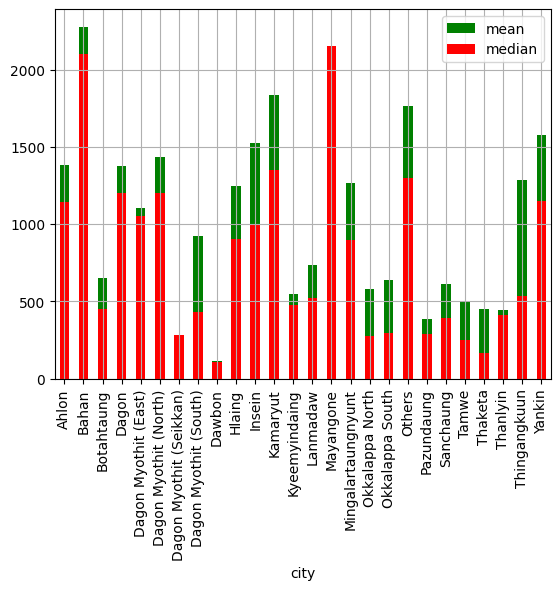

In [31]:

new_df.groupby('city')['price_million'].mean().plot(kind = 'bar' , color = 'green' , label = 'mean')
new_df.groupby('city')['price_million'].median().plot(kind = 'bar' , color = 'red' ,label = 'median')
plt.legend()
plt.grid()
plt.show()

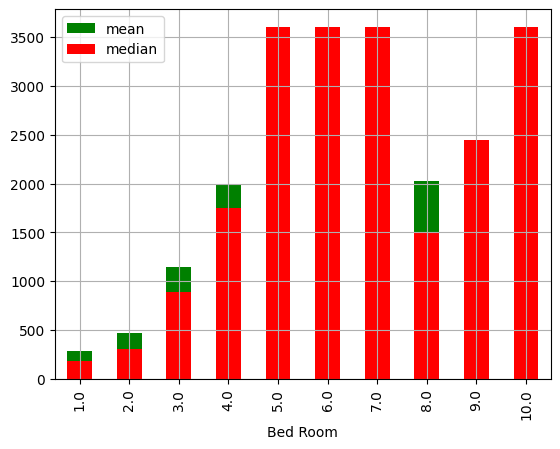

In [32]:
new_df.groupby('Bed Room')['price_million'].mean().plot(kind = 'bar' , color = 'green' , label = 'mean')
new_df.groupby('Bed Room')['price_million'].median().plot(kind = 'bar' , color = 'red' ,label = 'median')
plt.legend()
plt.grid()
plt.show()

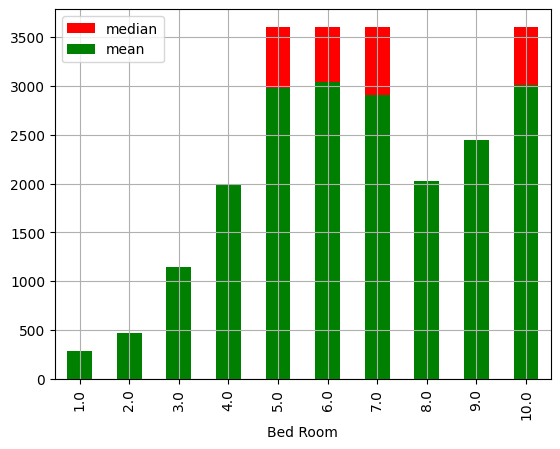

In [33]:
new_df.groupby('Bed Room')['price_million'].median().plot(kind = 'bar' , color = 'red' ,label = 'median')
new_df.groupby('Bed Room')['price_million'].mean().plot(kind = 'bar' , color = 'green' , label = 'mean')
plt.legend()
plt.grid()
plt.show()

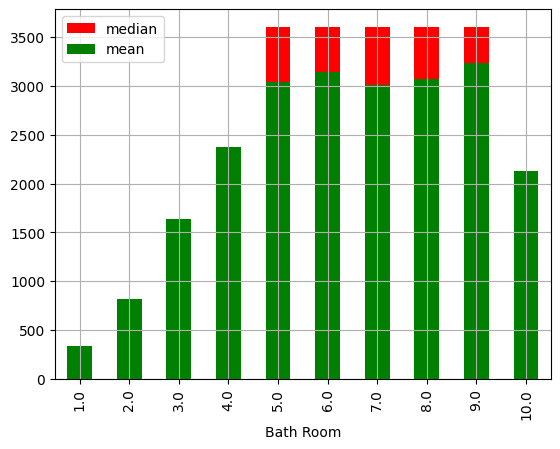

In [34]:
new_df.groupby('Bath Room')['price_million'].median().plot(kind = 'bar' , color = 'red' ,label = 'median')
new_df.groupby('Bath Room')['price_million'].mean().plot(kind = 'bar' , color = 'green' , label = 'mean')
plt.legend()
plt.grid()
plt.show()

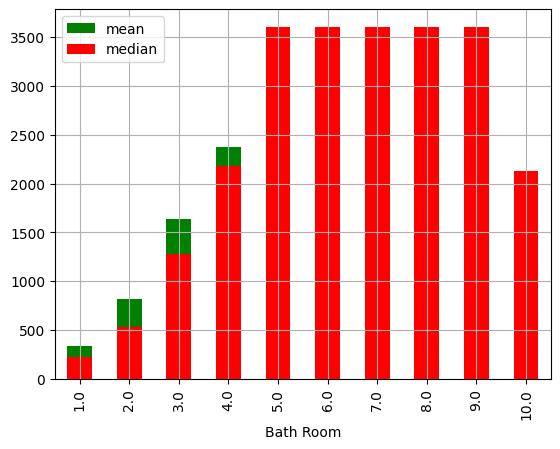

In [35]:

new_df.groupby('Bath Room')['price_million'].mean().plot(kind = 'bar' , color = 'green' , label = 'mean')
new_df.groupby('Bath Room')['price_million'].median().plot(kind = 'bar' , color = 'red' ,label = 'median')
plt.legend()
plt.grid()
plt.show()

In [36]:
new_df

,Type,Bed Room,Bath Room,Floor,city,Area_ft_square,price_million
0,Apartment,2.0,1.0,3.0,Okkalappa South,972.0,299.0
1,House,4.0,4.0,2.5,Dagon Myothit (North),1200.0,1170.0
2,House,5.0,7.0,3.0,Dagon Myothit (North),1320.0,980.0
3,House,5.0,3.0,2.0,Mayangone,4225.0,3602.5
4,House,3.0,3.0,2.5,Yankin,2400.0,3500.0
...,...,...,...,...,...,...,...
2192,House,5.0,3.0,3.0,Hlaing,1495.0,1200.0
2193,House,7.0,7.0,3.0,Thingangkuun,6400.0,3602.5
2194,House,7.0,4.0,2.0,Thingangkuun,6300.0,3200.0
2195,House,7.0,7.0,3.5,Bahan,7925.0,3602.5


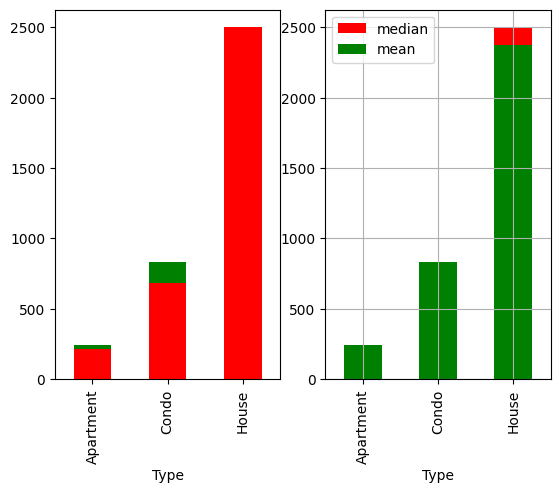

In [37]:
plt.subplot(1,2,1)
new_df.groupby('Type')['price_million'].mean().plot(kind = 'bar' , color = 'green' , label = 'mean')
new_df.groupby('Type')['price_million'].median().plot(kind = 'bar' , color = 'red' ,label = 'median')

plt.subplot(1,2,2)

new_df.groupby('Type')['price_million'].median().plot(kind = 'bar' , color = 'red' ,label = 'median')
new_df.groupby('Type')['price_million'].mean().plot(kind = 'bar' , color = 'green' , label = 'mean')

plt.legend()
plt.grid()
plt.show()

<Axes: xlabel='Type'>

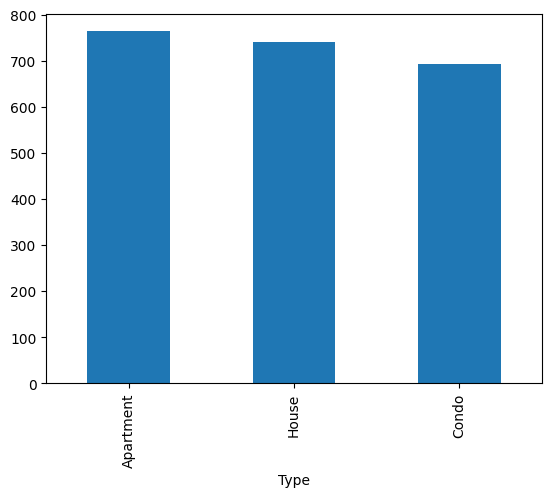

In [38]:
new_df['Type'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Area_ft_square', ylabel='Count'>

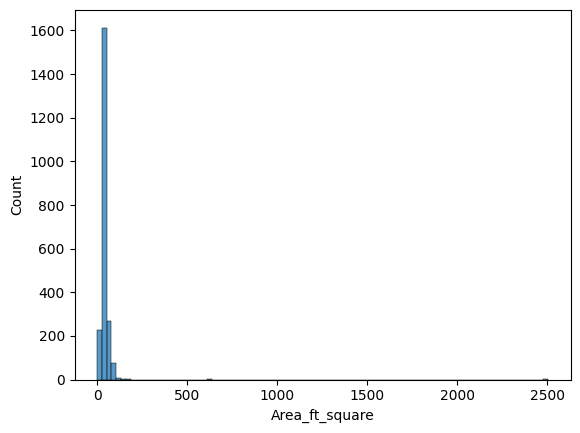

In [39]:
sns.histplot(np.sqrt(new_df['Area_ft_square']))

<Axes: ylabel='Area_ft_square'>

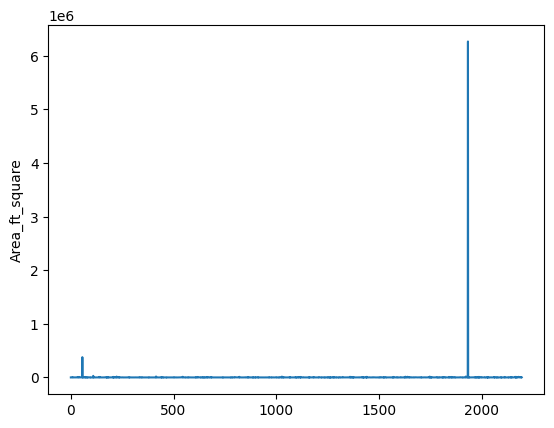

In [40]:
sns.lineplot(new_df['Area_ft_square'])

In [41]:
q1 = new_df['Area_ft_square'].quantile(0.25)
q3 = new_df['Area_ft_square'].quantile(0.75)
iqr = q3-q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)

In [42]:
otl_ind = new_df[new_df['Area_ft_square']>upper].index
new_df.loc[otl_ind,'Area_ft_square'] = upper

In [43]:
x_min = new_df['Area_ft_square'].min()
x_max = new_df['Area_ft_square'].max()
x_new_area = (new_df['Area_ft_square']-x_min)/(x_max-x_min)
    

In [44]:
x_min = new_df['price_million'].min()
x_max = new_df['price_million'].max()
x_new_price = (new_df['price_million']-x_min)/(x_max-x_min)

<Axes: xlabel='Area_ft_square', ylabel='price_million'>

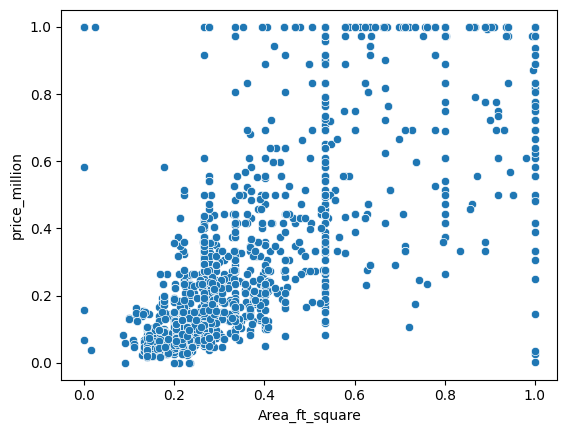

In [45]:
sns.scatterplot(x = x_new_area , y=x_new_price , palette = (new_df['Bed Room']))

<Axes: xlabel='Area_ft_square', ylabel='Density'>

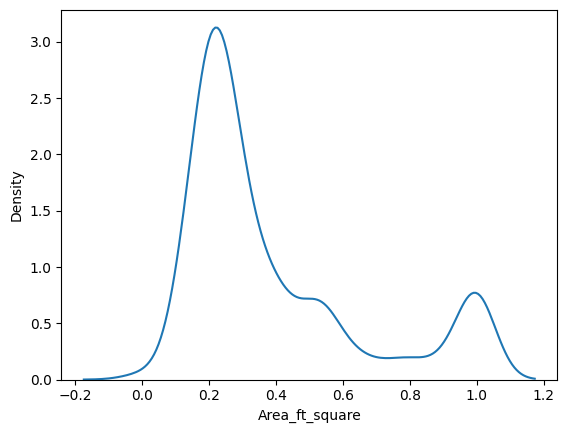

In [46]:
sns.kdeplot(x_new_area)

<Axes: xlabel='price_million', ylabel='Density'>

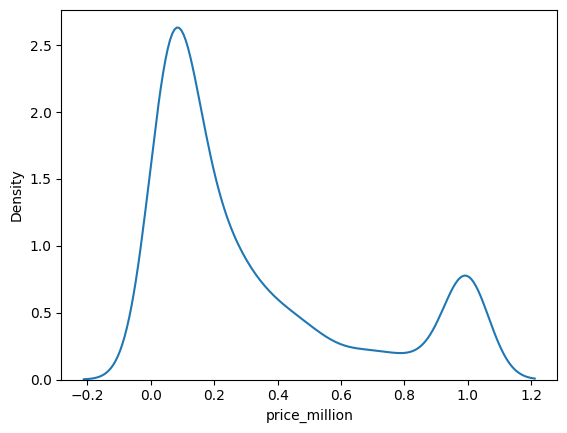

In [47]:
sns.kdeplot(x_new_price)

In [48]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,VotingRegressor
from xgboost import XGBRegressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler , OneHotEncoder 

from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

In [49]:
X = new_df.drop(columns = ['price_million'] , axis = 1)
y = new_df['price_million']

In [50]:
x_train , x_test , y_train,y_test = train_test_split(X,y , test_size = 0.2)

In [51]:
new_df.head()

,Type,Bed Room,Bath Room,Floor,city,Area_ft_square,price_million
0,Apartment,2.0,1.0,3.0,Okkalappa South,972.0,299.0
1,House,4.0,4.0,2.5,Dagon Myothit (North),1200.0,1170.0
2,House,5.0,7.0,3.0,Dagon Myothit (North),1320.0,980.0
3,House,5.0,3.0,2.0,Mayangone,4225.0,3602.5
4,House,3.0,3.0,2.5,Yankin,2400.0,3500.0


In [52]:
num_features = x_train.select_dtypes(float).columns
cat_features = x_train.select_dtypes(object).columns

In [53]:
num_pipeline = Pipeline(steps=[
    ('scale',MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('OneHotEncoder',OneHotEncoder())
])

In [54]:
transed = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_features),
    ('cat_pipeline',cat_pipeline,cat_features)
])

In [59]:
x_train_transed = transed.fit_transform(x_train).toarray()
x_test_transed  = transed.transform(x_test).toarray()

In [ ]:
x_test_transed

In [61]:
models = {'LinearRegression':LinearRegression(),
         'SVR':SVR(),
         'DecisionTreeRegressor':DecisionTreeRegressor(),
         "RandomForestRegressor":RandomForestRegressor(),
         'AdaBoostRegressor':AdaBoostRegressor(),
         "GradientBoostingRegressor":GradientBoostingRegressor(),
         "XGBoost":XGBRegressor()}

params = {
    'LinearRegression': {
        'fit_intercept': [True, False]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'epsilon': [0.1, 0.2]
    },
    'DecisionTreeRegressor': {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5]
    },
    "RandomForestRegressor": {
        'n_estimators': [100, 200],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False]
    },
    'AdaBoostRegressor': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    "GradientBoostingRegressor": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0]
    },
    'XGBoost': {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'gamma': [0, 0.1, 0.5],
    'reg_lambda': [1, 10],
    'reg_alpha': [0, 1]
}
}

In [ ]:
report = {}
for i in range(len(list(models.keys()))):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    param = params[model_name]

    gs = GridSearchCV(estimator=model , param_grid=param , cv=3 , n_jobs=-1)
    gs.fit(x_train_transed , y_train)
    print(f"Model --- {model_name} , {gs.best_score_}")

    model = model.set_params(**gs.best_params_)
    model.fit(x_train_transed , y_train)

    y_pred = model.predict(x_test_transed)
    r2 = r2_score(y_test , y_pred)

    report[model_name] = r2
    

Model --- LinearRegression , 0.8199698414572317
Model --- SVR , 0.7374869725301535
Model --- DecisionTreeRegressor , 0.7809921029112328
Model --- RandomForestRegressor , 0.8538827966634491
Model --- AdaBoostRegressor , 0.7917197138432414
Model --- GradientBoostingRegressor , 0.8483794582401433


In [ ]:
report

In [ ]:
report #Sandard Scaling